In [113]:
import pandas as pd
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hasnain\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hasnain\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [75]:
df = pd.read_csv('D:\datasets\emailRaw\emails.csv')

In [77]:
def transform_text(text):
    text = nltk.word_tokenize(text)
    y = []

    # Filter alphanumeric words and remove stopwords
    for i in text:
        if i.isalnum() and i not in stop_words and i not in string.punctuation:
            y.append(ps.stem(i))  # Stem directly here

    return " ".join(y)

# Apply the function to the DataFrame
df['text'] = df['text'].apply(transform_text)

In [82]:
spam_words = []
for i in df[df['spam']==1]['text'].tolist():
    for word in i.split():
        spam_words.append(word)

notSpam_words = []
for i in df[df['spam']==0]['text'].tolist():
    for word in i.split():
        notSpam_words.append(word)




spam 30 most common: 


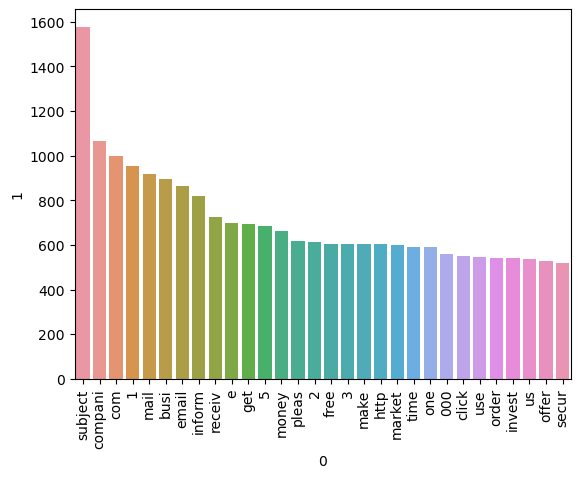


not spam 30 most common: 


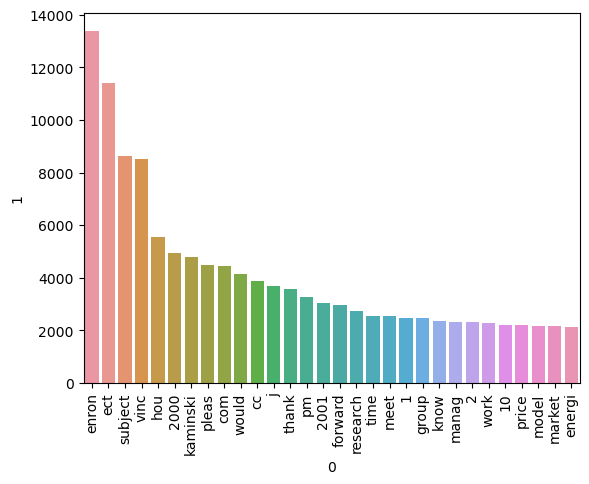

In [94]:
spam_common = pd.DataFrame(Counter(spam_words).most_common(30))
notSpam_common = pd.DataFrame(Counter(notSpam_words).most_common(30))
print("\nspam 30 most common: ")
sns.barplot(x=spam_common[0],y=spam_common[1])
plt.xticks(rotation='vertical')
plt.show()
print("\nnot spam 30 most common: ")
sns.barplot(x=notSpam_common[0],y=notSpam_common[1])
plt.xticks(rotation='vertical')
plt.show()

In [114]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['text']).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12187322, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [115]:
#as the dataset is imbalanced so using stratify=y
y = df['spam']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,stratify=y,random_state=42)
model1 = GaussianNB()
model2 = BernoulliNB()
model1.fit(X=X_train,y=y_train)
model2.fit(X=X_train,y=y_train)

BernoulliNB()

In [116]:
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
print("accuracy of GaussianNB: ")
print(accuracy_score(y_true=y_test,y_pred=y_pred1))
print(precision_score(y_pred=y_pred1,y_true=y_test))
print("accuracy of BernulliNB: ")
print(accuracy_score(y_true=y_test,y_pred=y_pred2))
print(precision_score(y_pred=y_pred2,y_true=y_test))

accuracy of GaussianNB: 
0.9269037748199869
0.962287104622871
accuracy of BernulliNB: 
0.843770456033166
0.9522673031026253
